  # Machine Learning Final Lab/CAC3

  <hr/>

  Submitted by <br>
  Name: **Sandeep Jabez** <br>
  Register Number: **20112029** <br>
  Class: **4BScDS** <br> 
  <hr/>








## Lab Overview  
### Objectives
• Find out a Dataset, and compare at least two different algorithms and choose the best one

• Use suitable Data Preprocessing and Feature Selection/Engineering Methods

• Fine tune the model and hyper parameters and Finalise the Model

• Make the model deployment-ready by giving User-Input provision

## Approach
My approach to this is to find a dataset first and do some preprocessing. Then I will try to find if there are any missing datasets. For the two different algorithms I am going to use Logistic Regression and Support Vector Machine. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# import SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
# import encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


In [42]:
df=pd.read_csv('airline.csv')

In [43]:
# Sampling of our dataset to 5000 rows
df=df.sample(n=10000,random_state=1)


In [44]:
df.head()
# print all the unique values in the dataframe
for i in range(len(df.columns)):
    print(df.columns[i],df.iloc[:,i].unique())




satisfaction ['dissatisfied' 'satisfied']
Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Age [49 37 43 47 56 33 57 67 41 45 29 26 51 16 21 32 14 61 59 34 50 20 68 44
 42 36 31 48 55 39 53 15 62 25 70 60 19 18 52 27 23 54 24 66 30  7 28 69
 22 64 10 40 38 13 35  9 58 12 46 11 65 17 79 85 63  8 71 75 77 72 80 76
 78 74 73]
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco' 'Business' 'Eco Plus']
Flight Distance [2501 1624 1755 ...  219 4845 3316]
Seat comfort [3 4 0 1 2 5]
Departure/Arrival time convenient [4 0 3 5 2 1]
Food and drink [2 4 0 1 3 5]
Gate location [3 2 1 4 5]
Inflight wifi service [5 2 1 3 4 0]
Inflight entertainment [2 4 1 5 3 0]
Online support [5 2 3 4 1]
Ease of Online booking [5 2 1 3 4 0]
On-board service [4 1 5 2 3]
Leg room service [4 1 3 5 2 0]
Baggage handling [4 1 3 5 2]
Checkin service [3 5 1 2 4]
Cleanliness [4 1 5 3 2]
Online boarding [5 2 1 3 4 0]
Departure Delay in Minutes [  0  12  15  16 192  89 158  39  83  19

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 24303 to 15559
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       10000 non-null  object 
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Seat comfort                       10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Food and drink                     10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Inflight wifi service              10000 non-null 

In [46]:
df.shape

(10000, 23)

In [47]:
df.isna().sum()

satisfaction                          0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Seat comfort                          0
Departure/Arrival time convenient     0
Food and drink                        0
Gate location                         0
Inflight wifi service                 0
Inflight entertainment                0
Online support                        0
Ease of Online booking                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Cleanliness                           0
Online boarding                       0
Departure Delay in Minutes            0
Arrival Delay in Minutes             25
dtype: int64

EDA


In [48]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


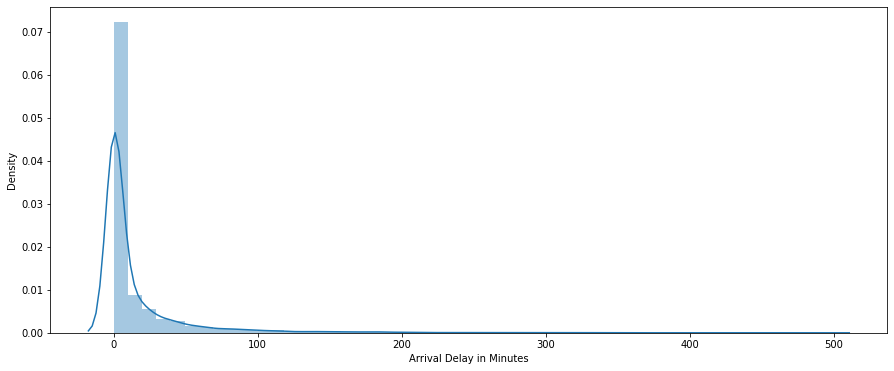

In [49]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


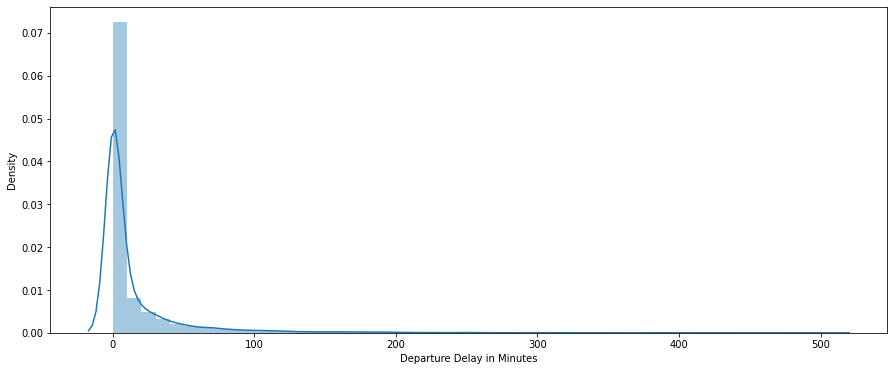

In [50]:
fig = plt.figure(figsize=(15,6))
sns.distplot(df['Departure Delay in Minutes']); 
plt.show()

<AxesSubplot:>

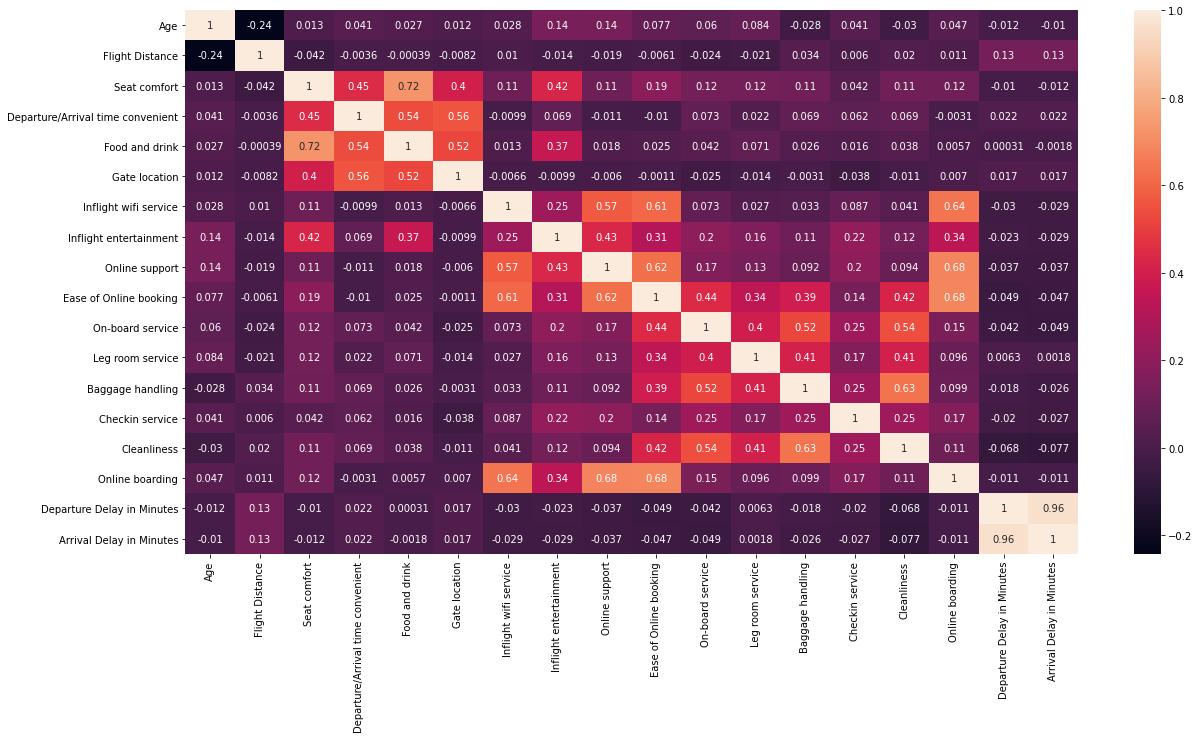

In [51]:
#heatmap
# increase size
plt.rcParams['figure.figsize'] = (20, 10)
sns.heatmap(df.corr(),annot=True)


<AxesSubplot:xlabel='Customer Type', ylabel='Age'>

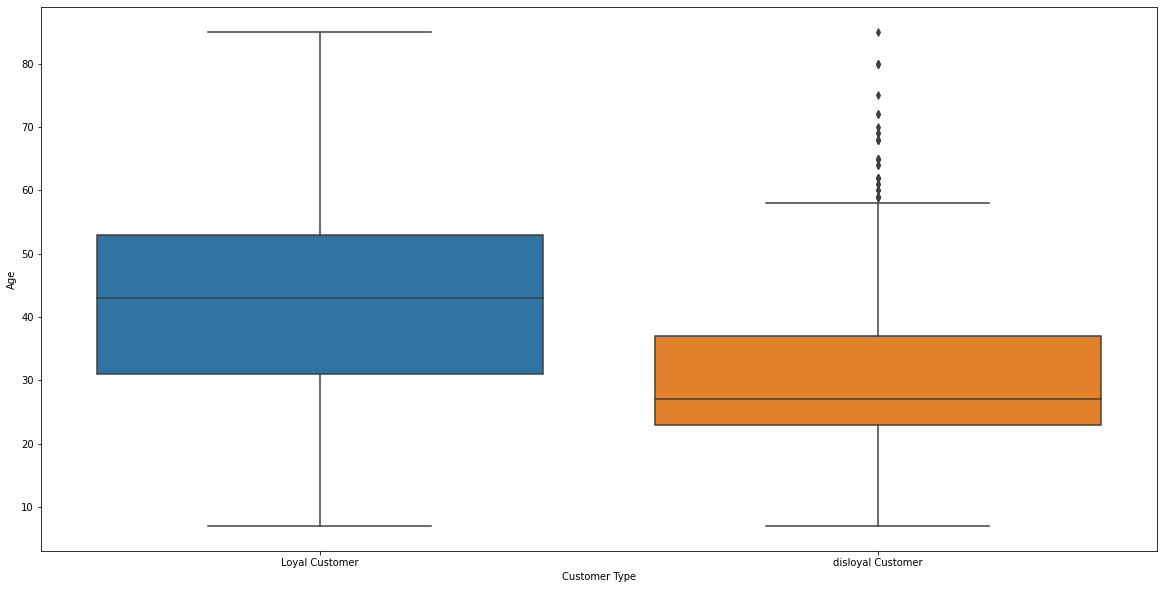

In [52]:
sns.boxplot(data = df, x='Customer Type', y='Age')

<AxesSubplot:xlabel='Class', ylabel='count'>

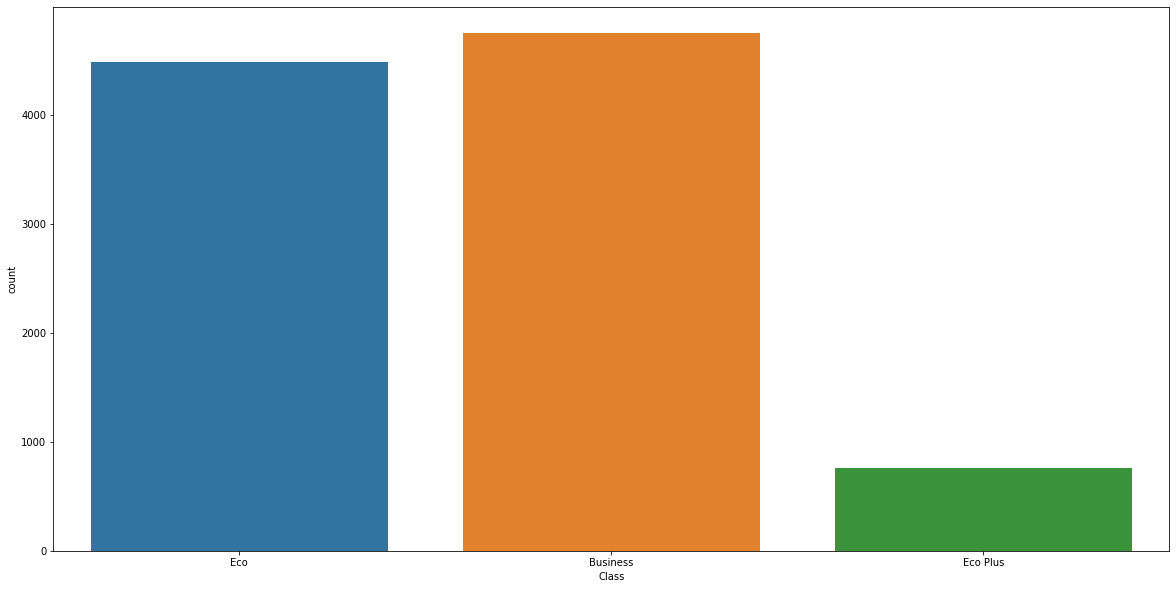

In [53]:
sns.countplot(data = df, x = 'Class')


<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

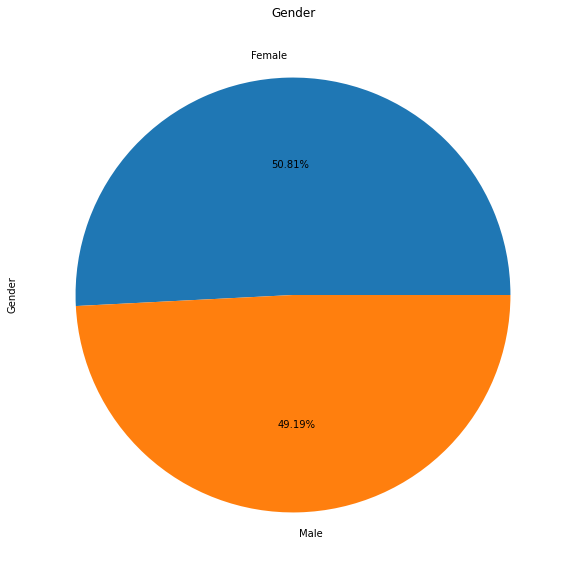

In [54]:

plt.figure(figsize=(10,10))
plt.title("Gender")
df["Gender"].value_counts().plot(kind="pie",autopct='%1.2f%%')

In [55]:
# sns.lmplot(x="Class", y="Flight Distance", data=df)
# plt.show()

We will do Encoding

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 24303 to 15559
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       10000 non-null  object 
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Seat comfort                       10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Food and drink                     10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Inflight wifi service              10000 non-null 

In [57]:
#ml

In [58]:
# label encoding

col=df.columns
for i in col:
    if df[i].dtype=='object':
        lbl=LabelEncoder()
        fitting_encoding=lbl.fit(df[i])
        df[i]=lbl.transform(df[i])



In [59]:
from sklearn.preprocessing import MinMaxScaler
df_normal=df.copy()
scaling = MinMaxScaler()
df = scaling.fit_transform(df)
df = pd.DataFrame(df, columns=col)





In [60]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.357445,0.6,0.8,0.4,...,1.00,1.0,0.75,0.8,0.75,0.50,0.75,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.229546,0.8,0.8,0.8,...,0.25,0.4,0.75,0.8,0.75,1.00,0.75,0.4,0.023857,0.002028
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.248651,0.0,0.0,0.0,...,0.25,0.2,0.00,0.2,0.00,1.00,0.00,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.161295,0.2,0.6,0.2,...,0.50,0.6,1.00,0.6,0.50,1.00,0.00,0.6,0.029821,0.024341
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.525011,0.4,0.8,0.4,...,0.50,1.0,1.00,1.0,1.00,0.00,1.00,1.0,0.031809,0.014199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.0,0.500000,0.0,0.0,0.304506,0.0,0.0,0.0,...,0.00,0.8,0.75,0.8,0.00,0.00,0.75,0.4,0.000000,0.000000
9996,1.0,1.0,0.0,0.371795,0.0,0.0,0.476302,0.4,0.4,0.4,...,1.00,0.8,0.75,0.8,0.75,0.75,0.75,0.8,0.000000,0.014199
9997,1.0,0.0,0.0,0.435897,0.0,0.0,0.388071,0.2,0.2,0.2,...,0.75,0.8,1.00,1.0,0.75,0.75,0.50,0.8,0.005964,0.000000
9998,1.0,0.0,0.0,0.525641,0.0,0.0,0.259735,0.4,0.4,0.4,...,1.00,1.0,1.00,1.0,1.00,0.50,1.00,0.8,0.015905,0.075051


In [61]:
df.head()


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,0.0,0.538462,1.0,0.5,0.357445,0.6,0.8,0.4,...,1.00,1.0,0.75,0.8,0.75,0.5,0.75,1.0,0.000000,0.000000
1,1.0,1.0,1.0,0.384615,0.0,0.0,0.229546,0.8,0.8,0.8,...,0.25,0.4,0.75,0.8,0.75,1.0,0.75,0.4,0.023857,0.002028
2,1.0,0.0,0.0,0.461538,0.0,0.0,0.248651,0.0,0.0,0.0,...,0.25,0.2,0.00,0.2,0.00,1.0,0.00,0.2,0.000000,0.000000
3,0.0,1.0,0.0,0.512821,1.0,0.5,0.161295,0.2,0.6,0.2,...,0.50,0.6,1.00,0.6,0.50,1.0,0.00,0.6,0.029821,0.024341
4,1.0,1.0,0.0,0.628205,0.0,0.0,0.525011,0.4,0.8,0.4,...,0.50,1.0,1.00,1.0,1.00,0.0,1.00,1.0,0.031809,0.014199


In [62]:
df_normal.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
24303,0,1,0,49,1,1,2501,3,4,2,...,5,5,4,4,4,3,4,5,0,0.0
59503,1,1,1,37,0,0,1624,4,4,4,...,2,2,4,4,4,5,4,2,12,1.0
63836,1,0,0,43,0,0,1755,0,0,0,...,2,1,1,1,1,5,1,1,0,0.0
2451,0,1,0,47,1,1,1156,1,3,1,...,3,3,5,3,3,5,1,3,15,12.0
124012,1,1,0,56,0,0,3650,2,4,2,...,3,5,5,5,5,1,5,5,16,7.0


Splitting dataset into features and target

In [63]:
features=df.drop(['satisfaction'] , axis=1)
target = df.satisfaction

In [64]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)


In [65]:
# logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [66]:
# print accuracy
print('Accuracy of logistic regression classifier on training set:')
print(logreg.score(X_train, y_train))
classs=classification_report(y_train,logreg.predict(X_train))
print(classs)

Accuracy of logistic regression classifier on training set:
0.842595244915497
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      3201
         1.0       0.85      0.86      0.85      3781

    accuracy                           0.84      6982
   macro avg       0.84      0.84      0.84      6982
weighted avg       0.84      0.84      0.84      6982



In [67]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print('Accuracy of SVM classifier on test set:')
print(clf.score(X_test, y_test))
classs=classification_report(y_test,y_pred)
print(classs)


Accuracy of SVM classifier on test set:
0.8379552288673572
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1401
         1.0       0.85      0.84      0.85      1592

    accuracy                           0.84      2993
   macro avg       0.84      0.84      0.84      2993
weighted avg       0.84      0.84      0.84      2993



Training a new model With PCA and setting the n_components as 14, i have set it as 14 because when i ran earlier as 0.9, it gave 14 components

In [68]:
# We will try applying PCA for dimensionality reduction

pca = PCA(n_components=14)
a=pca.fit(features)
pca_array=pca.transform(features)
pca_df=pd.DataFrame(pca_array)
pca_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.261117,0.756474,-0.531539,0.327421,-0.229568,0.430087,0.238067,-0.234409,-0.034743,0.016523,-0.086415,0.170465,-0.063008,-0.085332
1,0.335163,-0.383873,-0.411170,-0.587365,0.750755,0.165358,-0.579586,0.238811,-0.144444,0.075910,-0.170929,0.147881,-0.102206,-0.086897
2,1.183173,-0.588209,0.734779,0.503334,-0.449276,-0.786732,-0.702601,-0.340875,0.064966,0.064138,-0.018694,-0.210643,0.170241,-0.060202
3,0.581541,0.675928,-0.302181,0.746895,-0.053258,-0.066209,-0.408188,-0.195585,0.112699,0.585267,-0.204539,0.364997,0.061382,-0.056769
4,-0.296330,-0.209714,-0.776268,0.114469,0.196559,-0.293964,0.705564,0.156805,-0.171035,0.010555,0.024777,0.209332,-0.198326,0.077434


In [69]:
pca_df['y']=df.satisfaction
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,-0.261117,0.756474,-0.531539,0.327421,-0.229568,0.430087,0.238067,-0.234409,-0.034743,0.016523,-0.086415,0.170465,-0.063008,-0.085332,0.0
1,0.335163,-0.383873,-0.411170,-0.587365,0.750755,0.165358,-0.579586,0.238811,-0.144444,0.075910,-0.170929,0.147881,-0.102206,-0.086897,1.0
2,1.183173,-0.588209,0.734779,0.503334,-0.449276,-0.786732,-0.702601,-0.340875,0.064966,0.064138,-0.018694,-0.210643,0.170241,-0.060202,1.0
3,0.581541,0.675928,-0.302181,0.746895,-0.053258,-0.066209,-0.408188,-0.195585,0.112699,0.585267,-0.204539,0.364997,0.061382,-0.056769,0.0
4,-0.296330,-0.209714,-0.776268,0.114469,0.196559,-0.293964,0.705564,0.156805,-0.171035,0.010555,0.024777,0.209332,-0.198326,0.077434,1.0


<AxesSubplot:xlabel='0', ylabel='1'>

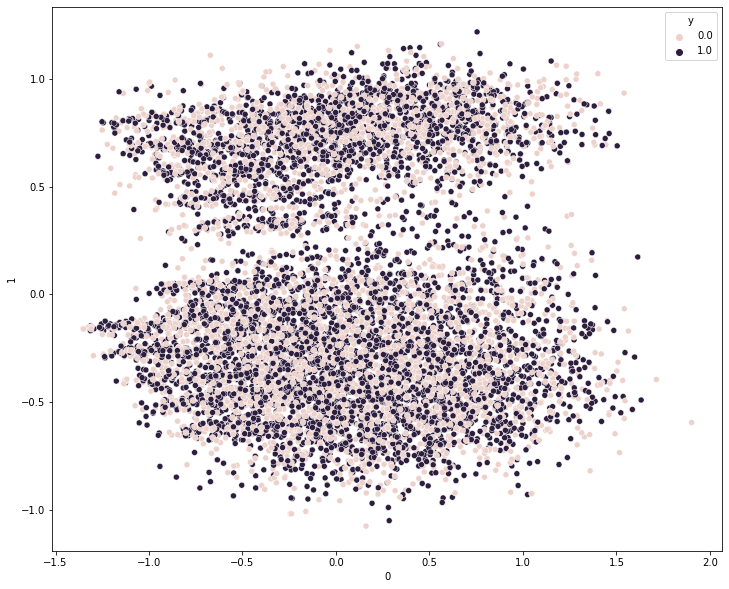

In [70]:
# scatter plot of the data
plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df)



In [71]:
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(pca_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,y
0,-0.261117,0.756474,-0.531539,0.327421,-0.229568,0.430087,0.238067,-0.234409,-0.034743,0.016523,-0.086415,0.170465,-0.063008,-0.085332,0.0
1,0.335163,-0.383873,-0.411170,-0.587365,0.750755,0.165358,-0.579586,0.238811,-0.144444,0.075910,-0.170929,0.147881,-0.102206,-0.086897,1.0
2,1.183173,-0.588209,0.734779,0.503334,-0.449276,-0.786732,-0.702601,-0.340875,0.064966,0.064138,-0.018694,-0.210643,0.170241,-0.060202,1.0
3,0.581541,0.675928,-0.302181,0.746895,-0.053258,-0.066209,-0.408188,-0.195585,0.112699,0.585267,-0.204539,0.364997,0.061382,-0.056769,0.0
4,-0.296330,-0.209714,-0.776268,0.114469,0.196559,-0.293964,0.705564,0.156805,-0.171035,0.010555,0.024777,0.209332,-0.198326,0.077434,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,0.798029,-0.410501,-0.407378,0.381693,-0.052395,-0.611978,0.518222,0.118401,-0.061040,0.251619,-0.360992,-0.259338,0.360499,-0.093981,0.0
9971,-0.299641,-0.349109,-0.778342,0.317393,-0.269201,-0.118921,-0.115075,0.079307,-0.075003,-0.031131,0.021777,0.016900,0.086356,0.135411,1.0
9972,-0.398855,-0.617820,0.144926,0.788493,-0.045430,-0.393266,-0.032045,-0.011191,0.039872,0.154372,-0.164120,0.187847,0.179364,0.093377,0.0
9973,-0.668542,-0.485414,0.085592,0.481862,0.264685,-0.342603,0.337106,-0.116625,0.031974,-0.016872,-0.113356,-0.054859,-0.207959,0.156719,1.0


In [72]:
# train_test split of pca_df
features_pca=pca_df.drop(['y'] , axis=1)
target_pca = pca_df.y
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(features_pca, target_pca, test_size=0.3, random_state=10)

In [73]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_pca, y_train_pca)
y_pred_pca=clf2.predict(X_test_pca)
print('Accuracy of SVM classifier on test set:')
print(clf2.score(X_test_pca, y_test_pca))
classs=classification_report(y_test_pca,y_pred_pca)
print(classs)




Accuracy of SVM classifier on test set:
0.5400335008375209
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1373
         1.0       0.54      1.00      0.70      1612

    accuracy                           0.54      2985
   macro avg       0.27      0.50      0.35      2985
weighted avg       0.29      0.54      0.38      2985



C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sande\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

Setting the component to be set as 10.

In [74]:
pca = PCA(n_components=10)
pca.fit(features)
pca_array=pca.transform(features)
pca_df2=pd.DataFrame(pca_array)
pca_df2

,0,1,2,3,4,5,6,7,8,9
0,-0.261117,0.756474,-0.531539,0.327421,-0.229568,0.430087,0.238065,-0.234409,-0.034722,0.016538
1,0.335163,-0.383873,-0.411170,-0.587365,0.750755,0.165358,-0.579586,0.238811,-0.144442,0.075908
2,1.183173,-0.588209,0.734779,0.503334,-0.449277,-0.786732,-0.702606,-0.340875,0.065043,0.064203
3,0.581541,0.675928,-0.302181,0.746895,-0.053258,-0.066209,-0.408189,-0.195585,0.112687,0.585267
4,-0.296330,-0.209714,-0.776268,0.114469,0.196559,-0.293964,0.705559,0.156805,-0.170961,0.010610
...,...,...,...,...,...,...,...,...,...,...
9970,0.798029,-0.410501,-0.407378,0.381693,-0.052395,-0.611978,0.518211,0.118400,-0.060862,0.251764
9971,-0.299641,-0.349109,-0.778342,0.317393,-0.269201,-0.118921,-0.115078,0.079307,-0.074958,-0.031097
9972,-0.398855,-0.617820,0.144926,0.788493,-0.045430,-0.393266,-0.032048,-0.011192,0.039907,0.154402
9973,-0.668542,-0.485414,0.085592,0.481862,0.264686,-0.342603,0.337108,-0.116625,0.031939,-0.016901


<AxesSubplot:xlabel='0', ylabel='1'>

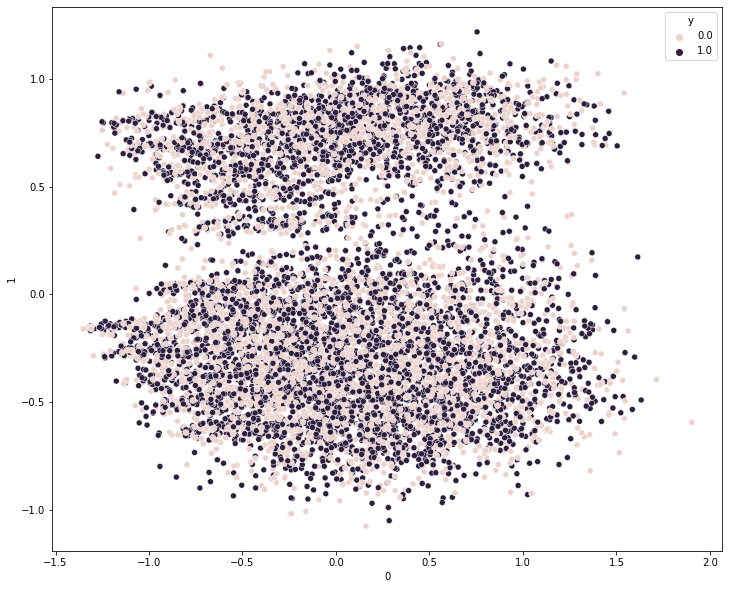

In [75]:
# scatter plot of the data
# scatter plot of the data
pca_df2_full=pd.concat([pca_df2,target_pca],axis=1)


plt.rcParams['figure.figsize'] = (12, 10)
sns.scatterplot(x=0, y=1, hue='y', data=pca_df2_full)
# pca_df2_full

In [76]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(pca_df2, target, test_size=0.3, random_state=10)
# running svm
clf3 = svm.SVC(kernel='linear')
clf3.fit(x_train2, y_train2)
y_pred_pca2=clf3.predict(x_test2)
print('Accuracy of SVM classifier on test set:')
print(clf3.score(x_test2, y_test2))
classs=classification_report(y_test2,y_pred_pca2)
print(classs)


Accuracy of SVM classifier on test set:
0.8249248245907117
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81      1401
         1.0       0.84      0.84      0.84      1592

    accuracy                           0.82      2993
   macro avg       0.82      0.82      0.82      2993
weighted avg       0.82      0.82      0.82      2993



Now we will try to run our code without PCA or min_max_scaler


In [77]:
# do sampling for df_normal
df_normal= df.sample(7000,random_state=10)
df_normal

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
9433,0.0,1.0,0.0,0.307692,1.0,0.5,0.233630,0.4,0.4,0.4,...,0.50,0.6,0.00,0.4,0.75,0.25,0.75,0.6,0.027833,0.006085
6434,0.0,1.0,0.0,0.333333,0.0,0.0,0.703515,0.8,0.6,0.6,...,0.75,0.2,0.50,0.8,0.50,0.25,0.50,0.2,0.085487,0.077079
2454,1.0,0.0,1.0,0.256410,0.0,0.0,0.325507,1.0,1.0,1.0,...,0.50,0.6,0.75,0.6,0.75,1.00,0.75,0.6,0.000000,0.000000
6498,1.0,0.0,0.0,0.243590,1.0,0.5,0.392154,0.8,1.0,0.8,...,0.50,0.6,0.50,0.8,0.75,0.25,1.00,0.6,0.000000,0.000000
1577,1.0,0.0,0.0,0.076923,1.0,0.5,0.298235,0.8,0.8,0.8,...,1.00,1.0,1.00,1.0,1.00,0.75,1.00,0.8,0.151093,0.146045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3919,1.0,1.0,0.0,0.525641,0.0,0.0,0.024209,0.4,0.2,0.4,...,0.75,0.8,0.75,1.0,1.00,1.00,0.75,0.8,0.000000,0.000000
9684,1.0,1.0,0.0,0.410256,0.0,0.0,0.351757,0.4,0.4,0.4,...,0.75,0.8,0.75,0.8,1.00,0.75,0.75,1.0,0.000000,0.000000
6788,1.0,1.0,0.0,0.525641,0.0,0.0,0.100190,0.8,0.8,0.8,...,0.75,1.0,1.00,1.0,1.00,0.75,1.00,0.6,0.000000,0.000000
7003,0.0,0.0,0.0,0.256410,1.0,1.0,0.141461,0.6,1.0,0.6,...,0.00,0.8,1.00,1.0,0.75,0.50,1.00,0.8,0.015905,0.030426


In [78]:
# svm using df_normal
clean_dataset(df_normal)
feature2=df_normal.drop(['satisfaction'] , axis=1)
target2 = df_normal.satisfaction
x_train3, x_test3, y_train3, y_test3 = train_test_split(feature2, target2, test_size=0.3, random_state=10)
# running svm
clf4 = svm.SVC(kernel='linear')
clf4.fit(x_train3, y_train3)
y_pred_pca3=clf4.predict(x_test3)
print('Accuracy of SVM classifier on test set:')
print(clf4.score(x_test3, y_test3))
classs=classification_report(y_test3,y_pred_pca3)
print(classs)


Accuracy of SVM classifier on test set:
0.8338095238095238
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       948
         1.0       0.85      0.84      0.85      1152

    accuracy                           0.83      2100
   macro avg       0.83      0.83      0.83      2100
weighted avg       0.83      0.83      0.83      2100



In [79]:
df_normal.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [80]:
# Taking user input
arr=[]
arr.append(str(input('Gender: Gender of the passengers (Female, Male')))
arr.append(str(input('Customer Type: The customer type (Loyal customer, disloyal customer)')))
arr.append(int(input('Age: The actual age of the passengers')))
arr.append(str(input('Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)')))
arr.append(str(input('Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)')))
arr.append(int(input('Flight distance: The flight distance of this journey')))
arr.append(str(input('Seat comfort: Satisfaction level of Seat comfort')))
arr.append(int(input('Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient')))
arr.append(int(input('Food and drink: Satisfaction level of Food and drink')))
arr.append(int(input('Gate location: Satisfaction level of Gate location')))
arr.append(int(input('Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)')))
arr.append(int(input('Inflight entertainment: Satisfaction level of inflight entertainment')))
arr.append(int(input('online support: Satisfaction level of inflight service')))
arr.append(int(input('Ease of Online booking: Satisfaction level of online booking')))
arr.append(int(input('On-board service: Satisfaction level of On-board service')))
arr.append(int(input('Leg room service: Satisfaction level of Leg room service')))
arr.append(int(input('Baggage handling: Satisfaction level of baggage handling')))
arr.append(int(input('Check-in service: Satisfaction level of Check-in service')))
arr.append(int(input('Cleanliness: Satisfaction level of Cleanliness')))
arr.append(int(input('Online boarding: Satisfaction level of online boarding')))
arr.append(int(input('Departure Delay in Minutes: Minutes delayed when departure')))
arr.append(int(input('Arrival Delay in Minutes: Minutes delayed when Arrival')))
testcase=pd.DataFrame(arr)


ValueError: invalid literal for int() with base 10: ''

In [ ]:
# we will do label encoding for the categorical variables
for i in col:
    if testcase[i].dtype=='object':
        lbl=LabelEncoder()
        testcase[i]=fitting_encoding(testcase[i],lbl)

testcase
        
        